/Users/Mathian/Documents/IA/Vision_par_ordinateur/VisualChess/code


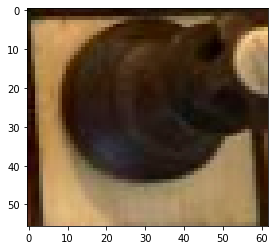

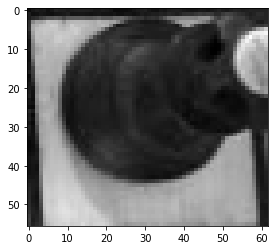

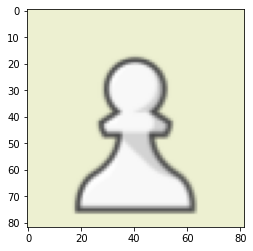

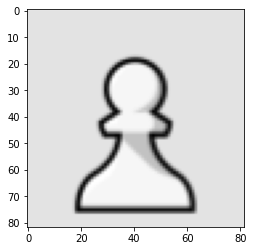

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import os
print(os.getcwd())

BoW = cv2.imread('.././photos_test/square/with_pieces/black_on_white_g.png',1)
BoW_c = cv2.cvtColor(BoW, cv2.COLOR_BGR2RGB)
BoW_g = cv2.imread('.././photos_test/square/with_pieces/black_on_white_g.png',0)
plt.imshow(BoW_c)
plt.show()
plt.imshow(BoW_g, cmap = 'gray')
plt.show()

Black_square = cv2.imread('.././photos_test/square/with_pieces/white_on_white_c.png',1)
WoW_c = cv2.cvtColor(Black_square, cv2.COLOR_BGR2RGB)
WoW_g = cv2.imread('.././photos_test/square/with_pieces/white_on_white_c.png',0)
plt.imshow(WoW_c)
plt.show()
plt.imshow(WoW_g, cmap = 'gray')
plt.show()

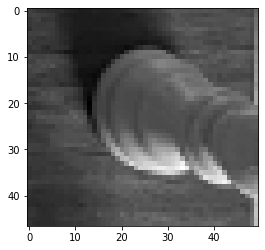

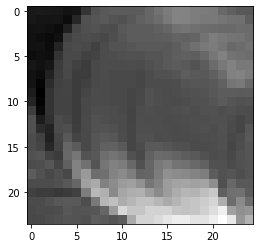

In [17]:
def get_central_part_of_square(img):
    X, Y = img.shape
    return img[int(X/4):int(3*X/4), int(Y/4):int(3*Y/4)]

plt.imshow(WoB_g, cmap='gray')
plt.show()
central_WoB_g = get_central_part_of_square(WoB_g)
plt.imshow(central_WoB_g, cmap='gray')
plt.show()


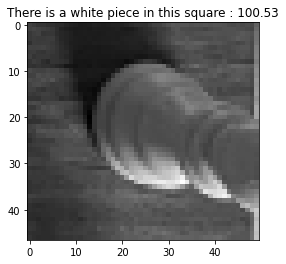

False

In [24]:
def is_piece_black(img, treshold = 100 ):
    central_img = get_central_part_of_square(img)
    whiteness = np.mean(central_img)
    is_black = whiteness < treshold
    if is_black:
        title = 'There is a black piece in this square : ' +  str(whiteness)
    else :
        title = "There is a white piece in this square : " +  str(whiteness)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()
    return is_black

is_piece_black(WoB_g)

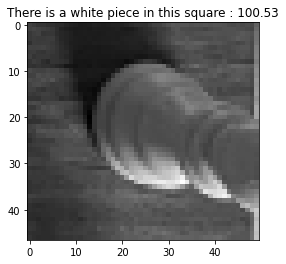

2

In [22]:
def get_color(img):
    '''
      We suppose to have only square with a piece
    args :
        img : image of a square (for instance : '.././photos_test/square/with_pieces/black_on_white_g.png')

    return :
      1 if the piece is black
      2 if the piece is white
    '''
    if is_piece_black(img):
        return 1
    return 2


get_color(WoB_g)

In [ ]:
pieces_path = '.././photos_test/square/with_pieces/'

def get_result_for_folder(folder_path):
    img_paths = get_img_path(folder_path)
    nb_img = len(img_paths)
    pieces_detected = 0
    for img_path in img_paths:
        img = cv2.imread(img_path,0)
        pieces_detected += show_img_and_piece_presence(img)
    print(pieces_detected, 'pieces detected on', nb_img, 'images' )

get_result_for_folder(empty_squares_path)